# Simple Orbito

here we test the fonctionalities of the new package

In [4]:
import space_mission_design
from space_mission_design.celestlab import celestlab_wrapper
from space_mission_design.visualisation import ploting_map

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [7]:
specitic_params = {"year":2019, "hour":12}

celestlab_wrapper.write_paramerter_file(specitic_params)
celestlab_wrapper.launch_celestlab()

sun_position, ecf_position, eclipses, cj_date = celestlab_wrapper.read_celestlab_results()


<KeysViewHDF5 ['Sun_dir', 'cjd', 'interv', 'pos_ecf']>


<IPython.core.display.Javascript object>


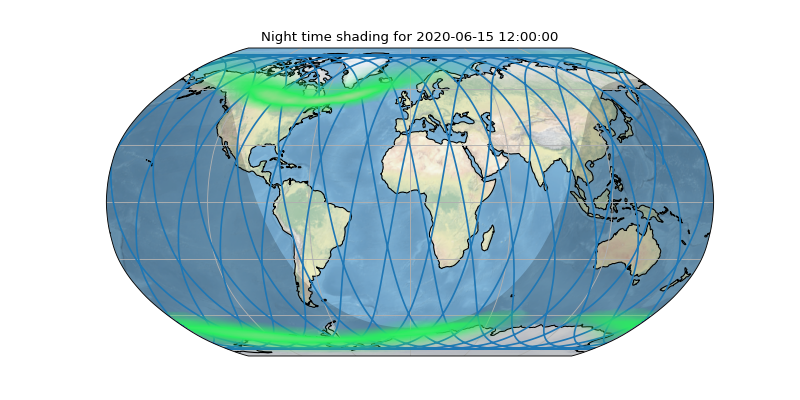

In [8]:
ploting_map.plot_planisphere(ecf_position)

<IPython.core.display.Javascript object>


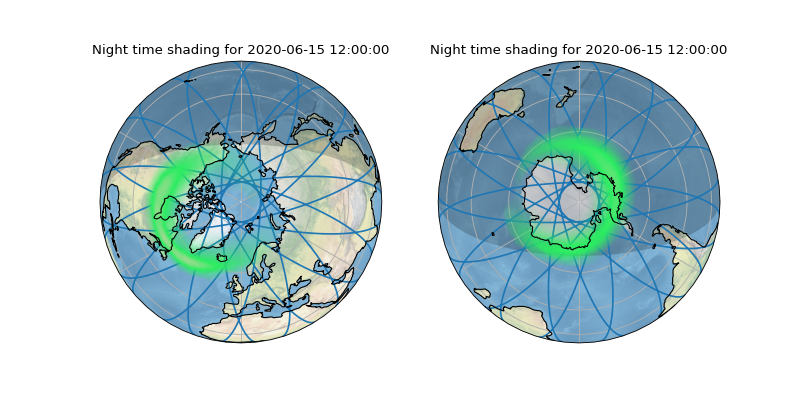

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7ffa48df9a30>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7ffa4830b910>)

In [9]:
ploting_map.plot_poles(ecf_position)

<KeysViewHDF5 ['Sun_dir', 'cjd', 'interv', 'pos_ecf']>


<IPython.core.display.Javascript object>


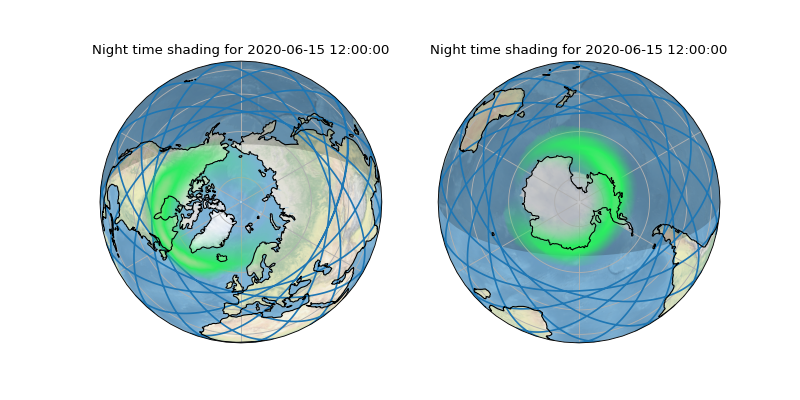

<IPython.core.display.Javascript object>


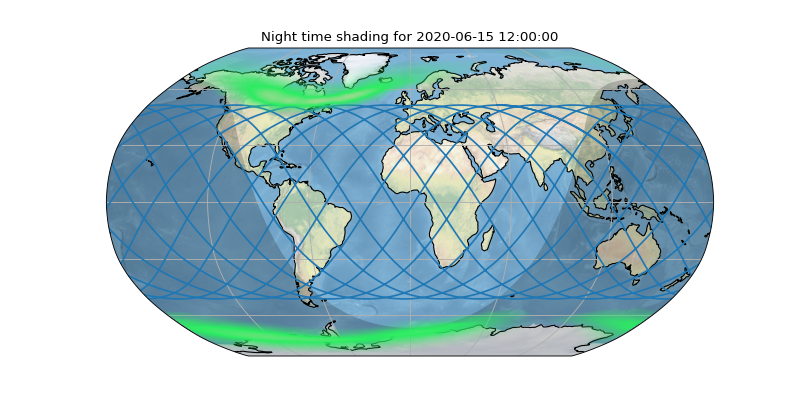

In [10]:
specitic_params = {"year":2019,
                  "inc": 51*np.pi/180}

celestlab_wrapper.write_paramerter_file(specitic_params)
celestlab_wrapper.launch_celestlab()

sun_position, ecf_position, eplispes, cj_date = celestlab_wrapper.read_celestlab_results()

ploting_map.plot_poles(ecf_position)
ploting_map.plot_planisphere(ecf_position)

In [13]:
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from astropy import time
from datetime import date
from poliastro.ephem import Ephem

def obrit_from_vectors(r, v, epoch=None):
    """ Return an Orbit from the Vector (Position and Velocity)"""
    if epoch is None:
        today = date.today()
        epoch = time.Time(today.strftime("%Y-%m-%d")+" 12:00")  # UTC by default
    return Orbit.from_vectors(Earth, r, v)


def earth_ephem(epoch=None):

    if epoch is None:
        today = date.today()
        epoch = time.Time(today.strftime("%Y-%m-%d") + " 12:00")  # UTC by default

    earth_eph = Ephem.from_body(Earth, epoch.tdb)

    return earth_eph


In [15]:
earth_eph = earth_ephem()
earth_eph

Ephemerides at 1 epochs from 2020-05-22 12:01:09.185 (TDB) to 2020-05-22 12:01:09.185 (TDB)

In [17]:
earth_eph.rv()

(<Quantity [[-0.48687601, -0.81050825, -0.35128976]] AU>,
 <Quantity [[ 0.01484812, -0.00757866, -0.00328572]] AU / d>)